In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

#### Sklearn

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [23]:
df.drop('id',axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [27]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [28]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [29]:
df.isna().sum()/len(df)*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [31]:
df.dropna(inplace=True)

In [32]:
num_columns = ['age','bmi','avg_glucose_level']
cate_columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

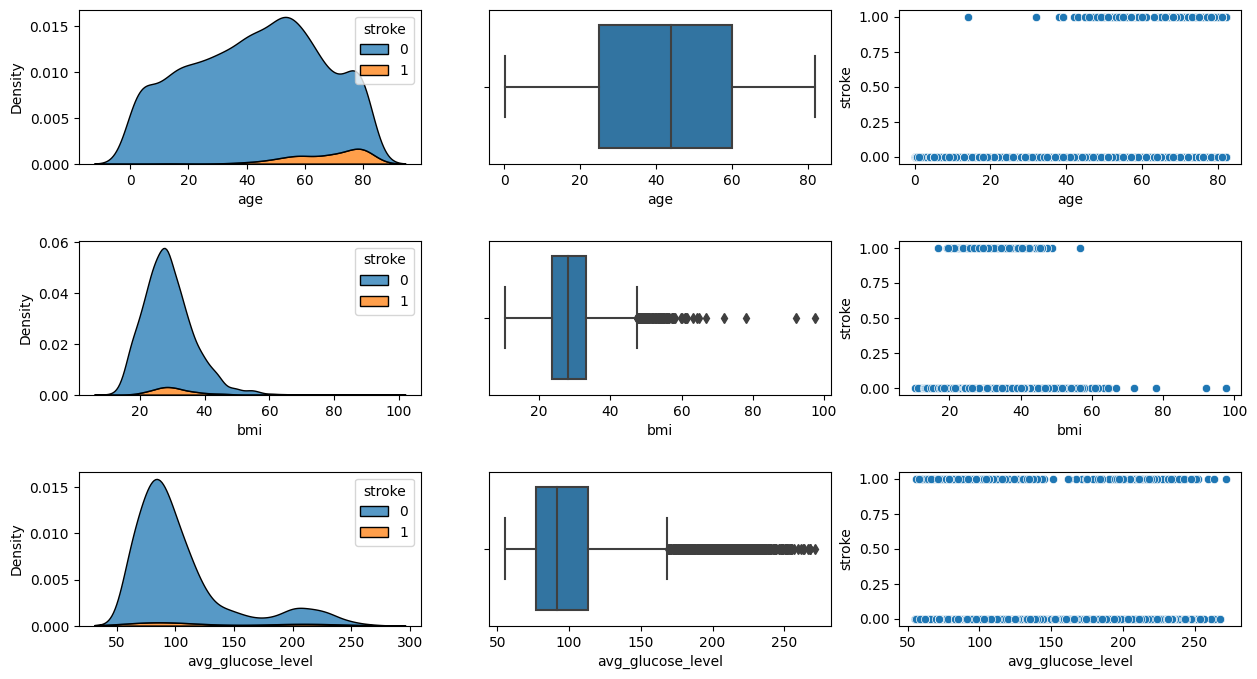

In [36]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
for num_col in num_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=df, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=num_col, data=df, ax=ax[i, 1])
    sns.scatterplot(x=num_col, y='stroke', data=df, ax=ax[i, 2])
    i+=1
plt.show()

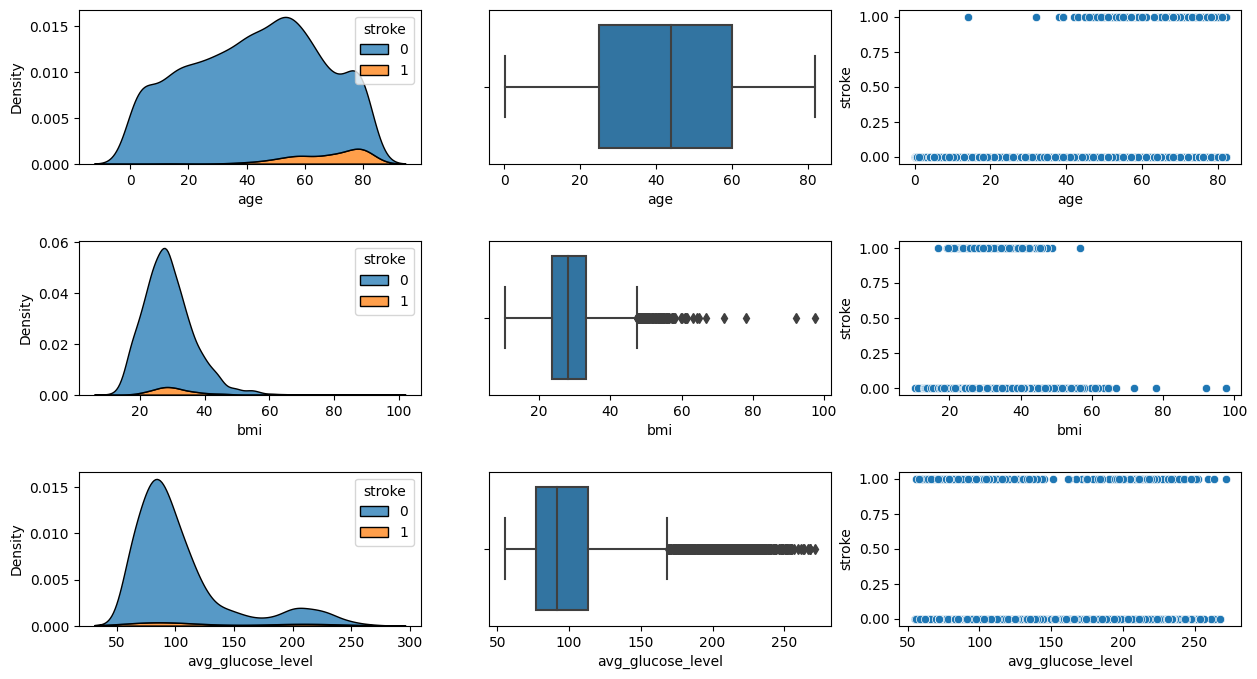

In [41]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15,8))
plt.subplots_adjust(hspace = 0.5)
for num_col in num_columns:
    sns.kdeplot(x=num_col, hue='stroke', data=df, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=num_col, data=df, ax=ax[i,1])
    sns.scatterplot(x=num_col, y='stroke', data=df, ax=ax[i,2])
    i+=1
plt.show()

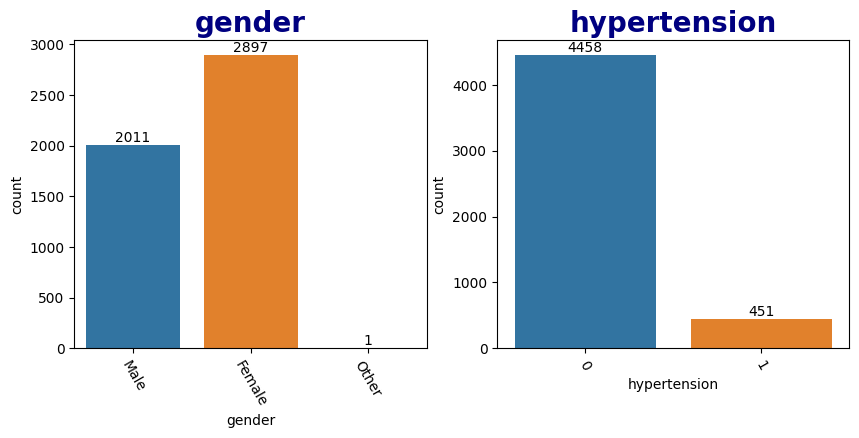

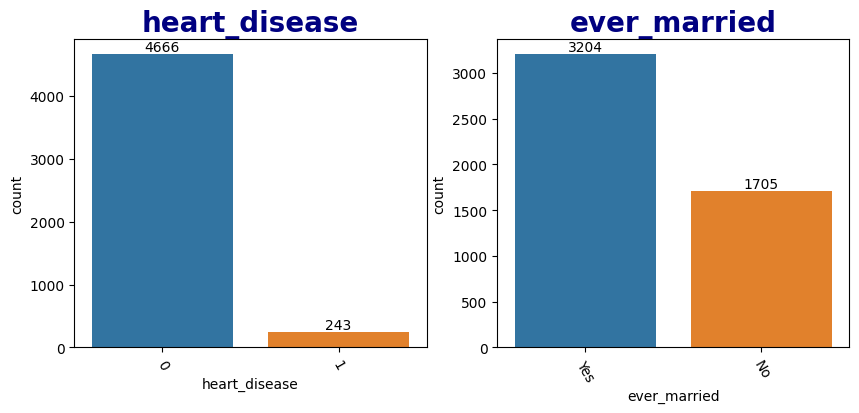

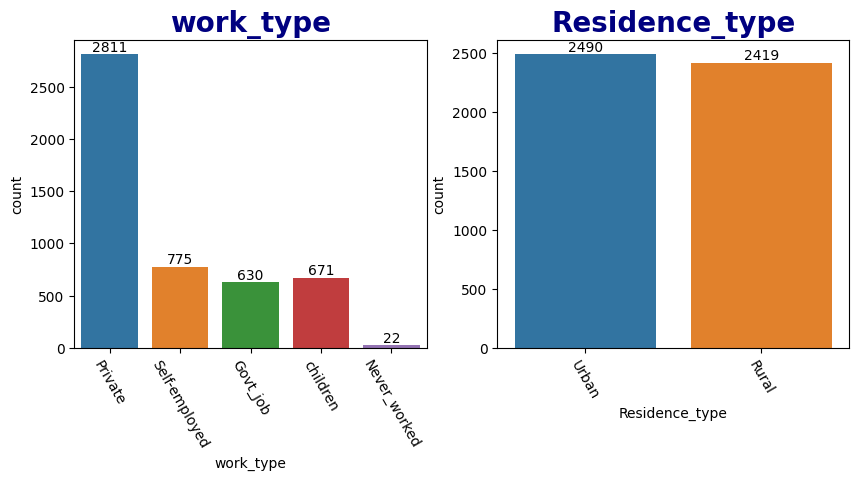

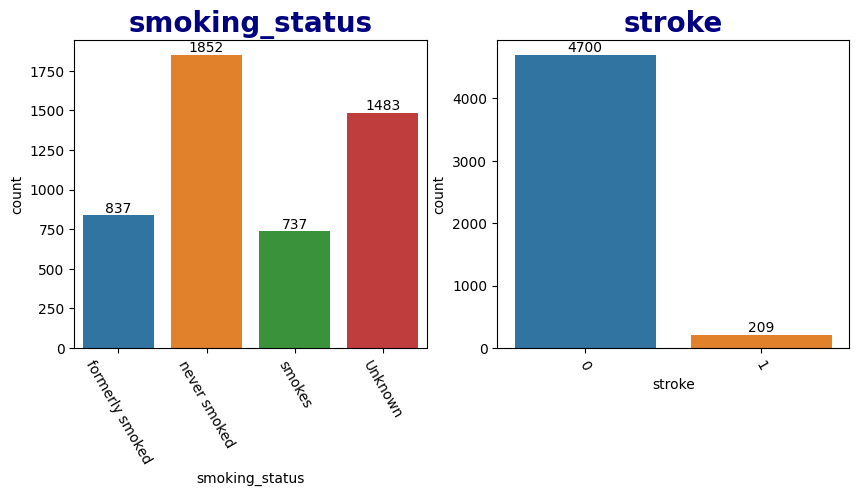

In [46]:
i=0
while i<8 :
    
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(cate_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=cate_columns[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    
    plt.subplot(1, 2, 2)
    plt.title(cate_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=cate_columns[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

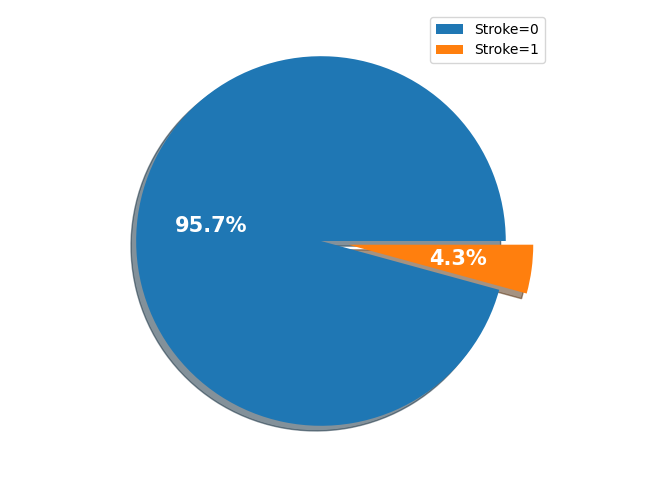

In [47]:
x = df['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

In [49]:
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp :
    print('column :', col)
    for index, unique in enumerate(df[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : gender
Male : 0
Female : 1
Other : 2
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


In [50]:
df_2 = df.replace(
    {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
)

# ever_married
df_2 =  df_2.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

# work_type
df_2 =  df_2.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

# smoking_status
df_2 =  df_2.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

# Residence_type
df_2 =  df_2.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)

In [52]:
df_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1


In [53]:
X_temp = df_2.drop(columns='stroke')
y = df_2.stroke

In [54]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.295274,0.522282,0.091872,0.049501,0.347321,0.210634,0.492768,0.231674,0.212981,0.527942
std,0.246098,0.275331,0.288875,0.216934,0.476167,0.281014,0.499999,0.205080,0.089966,0.363382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.000000,0.000000,0.101330,0.151203,0.333333
50%,0.500000,0.536133,0.000000,0.000000,0.000000,0.000000,0.000000,0.168775,0.203895,0.333333
75%,0.500000,0.731445,0.000000,0.000000,1.000000,0.500000,1.000000,0.269827,0.261168,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

### RandomForest

In [57]:
parameters = {
    'n_estimators' : [50, 100, 250, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 250}
accuracy :  0.956261782726523


In [58]:
t1 = datetime.now()
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
t2 = datetime.now()

In [59]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.96


In [60]:
delta = t2-t1
delta_rf = round(delta.total_seconds(), 3)
print('RandomForestClassifier takes : ', delta_rf, 'Seconds')

RandomForestClassifier takes :  5.579 Seconds


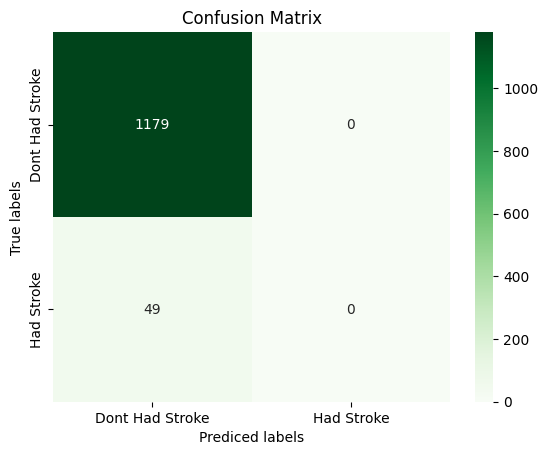

In [61]:
plot_confusion_matrix(y_test, y_pred_rf)

In [62]:
cr = metrics.classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic

In [63]:
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppDa

C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppDa

C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Tuned hyper parameters :  {'C': 10, 'class_weight': 'balanced', 'solver': 'saga'}
accuracy :  0.7601552374219394


C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [64]:
t1 = datetime.now()
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
t2 = datetime.now()

C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [65]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.439


In [66]:
delta = t2-t1
delta_lr = round(delta.total_seconds(), 3)
print('LogisticRegression takes : ', delta_lr, 'Seconds')

LogisticRegression takes :  0.256 Seconds


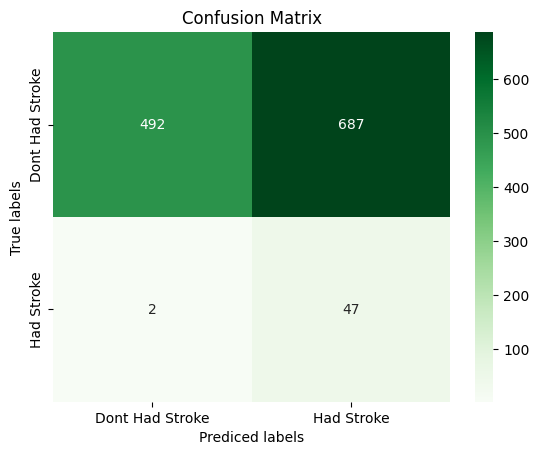

In [67]:
plot_confusion_matrix(y_test, y_pred_lr)

In [68]:
cr = metrics.classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.42      0.59      1179
           1       0.06      0.96      0.12        49

    accuracy                           0.44      1228
   macro avg       0.53      0.69      0.35      1228
weighted avg       0.96      0.44      0.57      1228



### SVC

In [69]:
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 0.001, 'gamma': 0.001}
accuracy :  0.9565335218569577


In [70]:
t1 = datetime.now()
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)
t2 = datetime.now()

In [71]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.96


In [72]:
delta = t2-t1
delta_svc = round(delta.total_seconds(), 3)
print('SVC : ', delta_svc, 'Seconds')

SVC :  0.205 Seconds


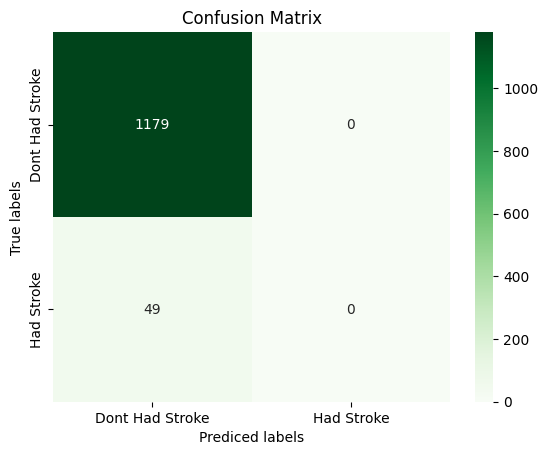

In [73]:
plot_confusion_matrix(y_test, y_pred_svc)

In [74]:
cr = metrics.classification_report(y_test, y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkh75\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTree

In [75]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}


In [76]:
t1 = datetime.now()
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
t2 = datetime.now()

In [77]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.957


In [78]:
delta = t2-t1
delta_tree = round(delta.total_seconds(), 3)
print('DecisionTreeClassifier takes : ', delta_tree, 'Seconds')

DecisionTreeClassifier takes :  0.042 Seconds


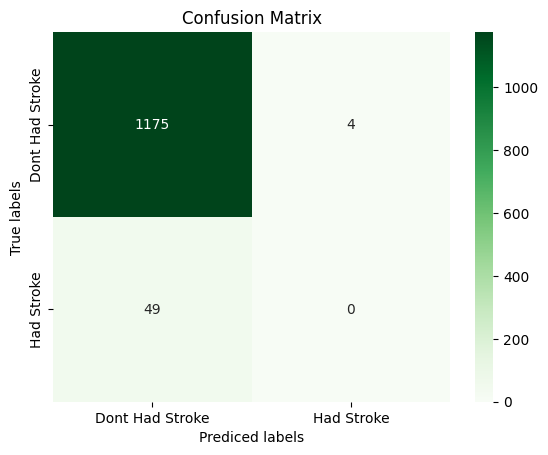

In [79]:
plot_confusion_matrix(y_test, y_pred_tree)


In [80]:
cr = metrics.classification_report(y_test, y_pred_tree)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



### KNeighbores

In [81]:
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

t1 = datetime.now()

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

t2 = datetime.now()

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 11, 'p': 1}
accuracy :  0.9565335218569577


In [82]:
t1 = datetime.now()
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
t2 = datetime.now()

In [83]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.959


In [84]:
delta = t2-t1
delta_knn = round(delta.total_seconds(), 3)
print('KNeighborsClassifier takes : ', delta_knn, 'Seconds')

KNeighborsClassifier takes :  0.056 Seconds


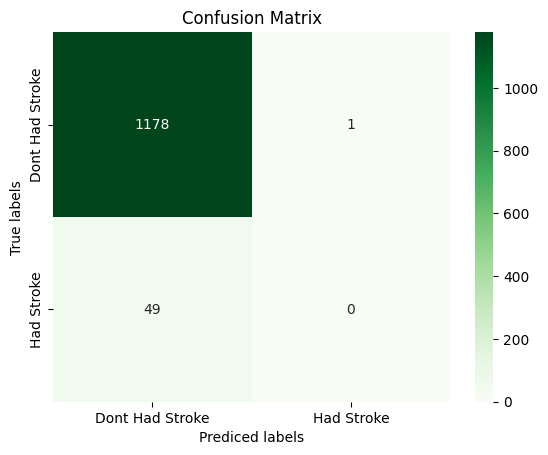

In [85]:
plot_confusion_matrix(y_test, y_pred_knn)


In [86]:
cr = metrics.classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



In [87]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score],
    'Delta_t' : [delta_rf, delta_lr, delta_svc, delta_tree, delta_knn]
})

result

,Algorithm,Score,Delta_t
0,RandomForestClassifier,0.960,5.579
1,LogisticRegression,0.439,0.256
2,SVC,0.960,0.205
3,DecisionTreeClassifier,0.957,0.042
4,KNeighborsClassifier,0.959,0.056


In [92]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X, y)
knn

KNeighborsClassifier(n_neighbors=11, p=1)

In [94]:
knn.score(X, y)

0.9576288449786107